In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#reading data
data=pd.read_csv("1828049.csv")

In [3]:
#checking for null value in column
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3899
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [4]:
#Where clear_date != null is putted into train dataframe
train = data.loc[data['clear_date'].notnull()]
train.shape

(46101, 19)

In [5]:
#Where clear_date == null is putted into test dataframe
test = data.loc[data.clear_date.isnull()]
test.shape

(3899, 19)

In [6]:
#taken for recall train dataframe
temp_test_data = data.loc[data.clear_date.isnull()]
temp_test_data.shape

(3899, 19)

In [7]:
#checking for null values inside train
train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             46101
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [8]:
#area_business column is full of null value and invoice_id has no requarement for training . so droped
train.drop(columns=['area_business','invoice_id'],inplace=True)
train.isnull().sum()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
dtype: int64

In [9]:
#sort the train data according to document_create_date.1
train.sort_values(['document_create_date.1'],inplace=True)
train.reset_index(inplace=True,drop=True)
train.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,CA02,0140106408,WAL-M us,2019-01-25 00:00:00,2019.0,2.960520e+09,2018-12-30,20181230,20181230,20190109.0,CAD,RV,1.0,4977.45,20181230.0,CA10,0
1,U001,0200769623,WAL-MAR trust,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,12428.72,20181230.0,NAH4,0
2,U001,0200726979,BJ'S corporation,2019-01-15 00:00:00,2019.0,1.928542e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,89.75,20181230.0,NAA8,0
3,U001,0200762301,C&S WH in,2019-01-15 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,26125.08,20181230.0,NAC6,0
4,U001,0200769623,WAL-MAR in,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,1764.66,20181230.0,NAH4,0


In [10]:
#80% of train data will used for train_final and 20% is for validation pourpose
train_final, validation_intermediate = train_test_split(train,test_size=.2,shuffle=False)
train_final.shape,validation_intermediate.shape

((36880, 17), (9221, 17))

In [11]:
#20% validation data is splited 50% slab (in the sorted document_create_date.1)
validation_final,test_final = train_test_split(validation_intermediate,test_size=.5,shuffle=False)
validation_final.shape,test_final.shape

((4610, 17), (4611, 17))

####  Training for train_final 

In [12]:
[col for col in train_final.columns if train_final[col].isnull().sum() > 0]

[]

In [13]:
train_final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,CA02,0140106408,WAL-M us,2019-01-25 00:00:00,2019.0,2.960520e+09,2018-12-30,20181230,20181230,20190109.0,CAD,RV,1.0,4977.45,20181230.0,CA10,0
1,U001,0200769623,WAL-MAR trust,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,12428.72,20181230.0,NAH4,0
2,U001,0200726979,BJ'S corporation,2019-01-15 00:00:00,2019.0,1.928542e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,89.75,20181230.0,NAA8,0
3,U001,0200762301,C&S WH in,2019-01-15 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,26125.08,20181230.0,NAC6,0
4,U001,0200769623,WAL-MAR in,2019-01-10 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,1.0,1764.66,20181230.0,NAH4,0


In [14]:
# temp_constant_check is taken for constant checking pourpose
temp_constant_check = train_final.drop(labels=['cust_number','business_code','name_customer','clear_date','posting_date','invoice_currency','document type','cust_payment_terms'], axis=1)
temp_constant_check.dtypes

buisness_year             float64
doc_id                    float64
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
isOpen                      int64
dtype: object

In [15]:
temp_constant_check.head()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,isOpen
0,2019.0,2.960520e+09,20181230,20181230,20190109.0,1.0,4977.45,20181230.0,0
1,2019.0,1.928543e+09,20181230,20181230,20190114.0,1.0,12428.72,20181230.0,0
2,2019.0,1.928542e+09,20181229,20181230,20190114.0,1.0,89.75,20181230.0,0
3,2019.0,1.928543e+09,20181230,20181230,20190114.0,1.0,26125.08,20181230.0,0
4,2019.0,1.928543e+09,20181230,20181230,20190114.0,1.0,1764.66,20181230.0,0


In [16]:
#checking for quasi-constant 
sel = VarianceThreshold(
    threshold=0.01)

sel.fit(temp_constant_check)
sum(sel.get_support())

6

In [17]:
len(temp_constant_check.columns[sel.get_support()])

6

In [18]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in temp_constant_check.columns
        if x not in temp_constant_check.columns[sel.get_support()]
    ]))

[x for x in temp_constant_check.columns if x not in temp_constant_check.columns[sel.get_support()]]

3


['buisness_year', 'posting_id', 'isOpen']

In [19]:
#quasi-constant are removed
train_final.drop(columns=['buisness_year','posting_id','isOpen'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


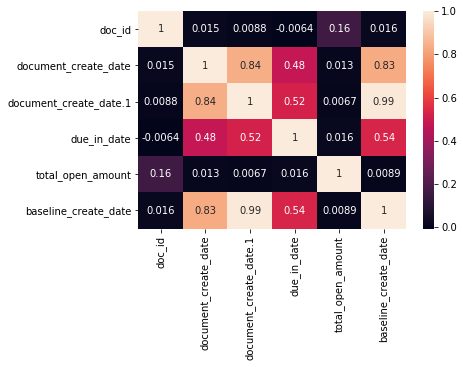

In [20]:
# corelation is performed to detect corelated colum
corelation = train_final.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [21]:
#removed corelated colum
train_final.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
#clear_date,posting_date,document_create_date.1,due_in_date are converted into datetime format for future operation
train_final['clear_date'] = pd.to_datetime(train_final['clear_date'])
train_final['posting_date'] = pd.to_datetime(train_final['posting_date']) 
train_final['document_create_date.1'] = pd.to_datetime(train_final['document_create_date.1'], format='%Y%m%d')
train_final['due_in_date'] = pd.to_datetime(train_final['due_in_date'], format='%Y%m%d')
train_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
0,CA02,0140106408,WAL-M us,2019-01-25,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,CAD,RV,4977.45,CA10
1,U001,0200769623,WAL-MAR trust,2019-01-10,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,12428.72,NAH4
2,U001,0200726979,BJ'S corporation,2019-01-15,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,89.75,NAA8
3,U001,0200762301,C&S WH in,2019-01-15,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,26125.08,NAC6
4,U001,0200769623,WAL-MAR in,2019-01-10,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,1764.66,NAH4


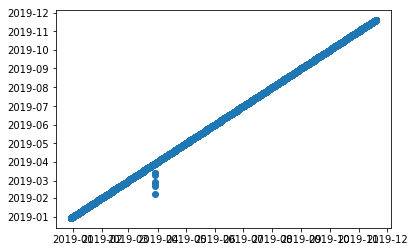

In [23]:
# posting_date,document_create_date.1 are making straightline graph so they are almost similar fetcher
plt.plot_date(train_final['posting_date'], train_final['document_create_date.1'])
plt.show()

In [24]:
#posting_date are removed for similarity with of document_create_date.1
train_final.drop(columns=['posting_date'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
#DELAY is calculated by (clear_date-due_in_date)
train_final['DELAY']=train_final['clear_date'] - train_final['due_in_date']
train_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,DELAY
0,CA02,0140106408,WAL-M us,2019-01-25,2.960520e+09,2018-12-30,2019-01-09,CAD,RV,4977.45,CA10,16 days
1,U001,0200769623,WAL-MAR trust,2019-01-10,1.928543e+09,2018-12-30,2019-01-14,USD,RV,12428.72,NAH4,-4 days
2,U001,0200726979,BJ'S corporation,2019-01-15,1.928542e+09,2018-12-30,2019-01-14,USD,RV,89.75,NAA8,1 days
3,U001,0200762301,C&S WH in,2019-01-15,1.928543e+09,2018-12-30,2019-01-14,USD,RV,26125.08,NAC6,1 days
4,U001,0200769623,WAL-MAR in,2019-01-10,1.928543e+09,2018-12-30,2019-01-14,USD,RV,1764.66,NAH4,-4 days


In [26]:
train_final.shape

(36880, 12)

In [27]:
train_final[train_final['invoice_currency'] == 'CAD']

,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,DELAY
0,CA02,0140106408,WAL-M us,2019-01-25,2.960520e+09,2018-12-30,2019-01-09,CAD,RV,4977.45,CA10,16 days
39,CA02,0140105847,GORDON F systems,2019-01-14,2.960521e+09,2018-12-30,2019-01-12,CAD,RV,66459.30,CA10,2 days
48,CA02,0140104229,A & W F associates,2019-01-18,2.960521e+09,2018-12-30,2019-01-10,CAD,RV,4612.95,CA10,8 days
108,CA02,0140104440,SO,2019-01-16,2.960521e+09,2018-12-31,2019-01-12,CAD,RV,89597.99,CA10,4 days
129,CA02,0140104423,METRO trust,2019-01-15,2.960520e+09,2018-12-31,2019-01-13,CAD,RV,49685.50,CA10,2 days
133,CA02,0140106408,WAL-M us,2019-01-25,2.960521e+09,2018-12-31,2019-01-10,CAD,RV,12506.30,CA10,15 days
148,CA02,0140104409,LOB co,2019-01-07,2.960520e+09,2019-01-01,2019-01-11,CAD,RV,292.65,CAX2,-4 days
177,CA02,0140104409,LOB associates,2019-01-18,2.960521e+09,2019-01-02,2019-01-14,CAD,RV,79376.35,CA10,4 days
180,CA02,0140104440,SO foundation,2019-01-17,2.960521e+09,2019-01-02,2019-01-13,CAD,RV,319238.63,CA10,4 days
199,CA02,0140106408,WAL-M us,2019-01-25,2.960520e+09,2019-01-02,2019-01-12,CAD,RV,86806.08,CA10,13 days


In [28]:
train_final.dtypes

business_code                      object
cust_number                        object
name_customer                      object
clear_date                 datetime64[ns]
doc_id                            float64
document_create_date.1     datetime64[ns]
due_in_date                datetime64[ns]
invoice_currency                   object
document type                      object
total_open_amount                 float64
cust_payment_terms                 object
DELAY                     timedelta64[ns]
dtype: object

In [29]:
#CAD are converted into USD
train_final['total_open_amount'] = np.where((train_final['invoice_currency'] == 'CAD') ,((train_final['total_open_amount'])*0.78),(train_final['total_open_amount']))

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
train_final.head()

,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,DELAY
0,CA02,0140106408,WAL-M us,2019-01-25,2.960520e+09,2018-12-30,2019-01-09,CAD,RV,3882.411,CA10,16 days
1,U001,0200769623,WAL-MAR trust,2019-01-10,1.928543e+09,2018-12-30,2019-01-14,USD,RV,12428.720,NAH4,-4 days
2,U001,0200726979,BJ'S corporation,2019-01-15,1.928542e+09,2018-12-30,2019-01-14,USD,RV,89.750,NAA8,1 days
3,U001,0200762301,C&S WH in,2019-01-15,1.928543e+09,2018-12-30,2019-01-14,USD,RV,26125.080,NAC6,1 days
4,U001,0200769623,WAL-MAR in,2019-01-10,1.928543e+09,2018-12-30,2019-01-14,USD,RV,1764.660,NAH4,-4 days


In [31]:
train_final['invoice_currency'] = 'USD'
train_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,DELAY
0,CA02,0140106408,WAL-M us,2019-01-25,2.960520e+09,2018-12-30,2019-01-09,USD,RV,3882.411,CA10,16 days
1,U001,0200769623,WAL-MAR trust,2019-01-10,1.928543e+09,2018-12-30,2019-01-14,USD,RV,12428.720,NAH4,-4 days
2,U001,0200726979,BJ'S corporation,2019-01-15,1.928542e+09,2018-12-30,2019-01-14,USD,RV,89.750,NAA8,1 days
3,U001,0200762301,C&S WH in,2019-01-15,1.928543e+09,2018-12-30,2019-01-14,USD,RV,26125.080,NAC6,1 days
4,U001,0200769623,WAL-MAR in,2019-01-10,1.928543e+09,2018-12-30,2019-01-14,USD,RV,1764.660,NAH4,-4 days


In [32]:
# doc_id, document type and name_customer are removed because they have no roll in training
train_final.drop(columns=['doc_id','document type','name_customer'],inplace=True)
train_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,DELAY
0,CA02,0140106408,2019-01-25,2018-12-30,2019-01-09,USD,3882.411,CA10,16 days
1,U001,0200769623,2019-01-10,2018-12-30,2019-01-14,USD,12428.720,NAH4,-4 days
2,U001,0200726979,2019-01-15,2018-12-30,2019-01-14,USD,89.750,NAA8,1 days
3,U001,0200762301,2019-01-15,2018-12-30,2019-01-14,USD,26125.080,NAC6,1 days
4,U001,0200769623,2019-01-10,2018-12-30,2019-01-14,USD,1764.660,NAH4,-4 days


In [33]:
# month_quarter,month are calculated for further use
train_final['document_create_date.1_month_quarter'] = train_final['document_create_date.1'].dt.quarter
train_final['due_in_date_month_quarter'] = train_final['due_in_date'].dt.quarter
train_final['document_create_date.1_month'] = train_final['document_create_date.1'].dt.month
train_final['due_in_date_month'] = train_final['due_in_date'].dt.month

train_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,CA02,0140106408,2019-01-25,2018-12-30,2019-01-09,USD,3882.411,CA10,16 days,4,1,12,1
1,U001,0200769623,2019-01-10,2018-12-30,2019-01-14,USD,12428.720,NAH4,-4 days,4,1,12,1
2,U001,0200726979,2019-01-15,2018-12-30,2019-01-14,USD,89.750,NAA8,1 days,4,1,12,1
3,U001,0200762301,2019-01-15,2018-12-30,2019-01-14,USD,26125.080,NAC6,1 days,4,1,12,1
4,U001,0200769623,2019-01-10,2018-12-30,2019-01-14,USD,1764.660,NAH4,-4 days,4,1,12,1


In [34]:
train_final.head()

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,CA02,0140106408,2019-01-25,2018-12-30,2019-01-09,USD,3882.411,CA10,16 days,4,1,12,1
1,U001,0200769623,2019-01-10,2018-12-30,2019-01-14,USD,12428.720,NAH4,-4 days,4,1,12,1
2,U001,0200726979,2019-01-15,2018-12-30,2019-01-14,USD,89.750,NAA8,1 days,4,1,12,1
3,U001,0200762301,2019-01-15,2018-12-30,2019-01-14,USD,26125.080,NAC6,1 days,4,1,12,1
4,U001,0200769623,2019-01-10,2018-12-30,2019-01-14,USD,1764.660,NAH4,-4 days,4,1,12,1


In [35]:
train_final.shape

(36880, 13)

In [36]:
# lablencoding is performed in business_code,cust_number and cust_payment_terms because they are catagorical column and can not passed into model
labelencoder = LabelEncoder()
train_final.iloc[:,0] = labelencoder.fit_transform(train_final.iloc[:,0])
train_final.iloc[:,1] = labelencoder.fit_transform(train_final.iloc[:,1])
train_final.iloc[:,7] = labelencoder.fit_transform(train_final.iloc[:,7])

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [37]:
train_final.head()

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,0,419,2019-01-25,2018-12-30,2019-01-09,USD,3882.411,6,16 days,4,1,12,1
1,1,831,2019-01-10,2018-12-30,2019-01-14,USD,12428.720,35,-4 days,4,1,12,1
2,1,727,2019-01-15,2018-12-30,2019-01-14,USD,89.750,22,1 days,4,1,12,1
3,1,815,2019-01-15,2018-12-30,2019-01-14,USD,26125.080,27,1 days,4,1,12,1
4,1,831,2019-01-10,2018-12-30,2019-01-14,USD,1764.660,35,-4 days,4,1,12,1


In [38]:
train_final['invoice_currency'].unique()

array(['USD'], dtype=object)

In [39]:
#As CAD was converted into USD so invoice_currency has no use so dropped
train_final.drop(columns=['invoice_currency'],inplace=True)
train_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,0,419,2019-01-25,2018-12-30,2019-01-09,3882.411,6,16 days,4,1,12,1
1,1,831,2019-01-10,2018-12-30,2019-01-14,12428.720,35,-4 days,4,1,12,1
2,1,727,2019-01-15,2018-12-30,2019-01-14,89.750,22,1 days,4,1,12,1
3,1,815,2019-01-15,2018-12-30,2019-01-14,26125.080,27,1 days,4,1,12,1
4,1,831,2019-01-10,2018-12-30,2019-01-14,1764.660,35,-4 days,4,1,12,1


In [40]:
#clear_date,document_create_date.1,due_in_date are dropped because they are catagorical column and can not be passed into model
train_final.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)
train_final['DELAY'] = train_final['DELAY'].dt.days
train_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,business_code,cust_number,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
0,0,419,3882.411,6,16,4,1,12,1
1,1,831,12428.720,35,-4,4,1,12,1
2,1,727,89.750,22,1,4,1,12,1
3,1,815,26125.080,27,1,4,1,12,1
4,1,831,1764.660,35,-4,4,1,12,1


In [41]:
train_final.describe()

,business_code,cust_number,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
count,36880.000000,36880.000000,36880.000000,36880.000000,36880.000000,36880.000000,36880.000000,36880.000000,36880.000000
mean,0.979176,769.722234,30877.945613,27.739723,1.014018,2.322668,2.478091,5.886876,6.402223
std,0.553835,255.920508,37367.987814,11.784629,11.290258,1.036107,1.046368,3.044105,3.050367
min,0.000000,0.000000,0.780000,0.000000,-83.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,682.000000,4427.070000,22.000000,-3.000000,1.000000,2.000000,3.000000,4.000000
50%,1.000000,831.000000,16928.395000,22.000000,0.000000,2.000000,2.000000,6.000000,6.000000
75%,1.000000,846.000000,45381.832500,35.000000,2.000000,3.000000,3.000000,8.000000,9.000000
max,5.000000,1345.000000,985247.060000,67.000000,212.000000,4.000000,4.000000,12.000000,12.000000


#### preparation in validation_final  dataframe for fitting into model

In [42]:
validation_final.drop(columns=['buisness_year','posting_id','isOpen'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
validation_final.drop(columns=['document_create_date','baseline_create_date'],inplace=True)
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
36880,U001,0200230690,DECA in,2019-12-02 00:00:00,1.930165e+09,2019-11-19,20191119,20191209.0,USD,RV,455.64,NAM4
36881,CA02,0140104409,LOB foundation,2019-12-06 00:00:00,2.960594e+09,2019-11-19,20191119,20191208.0,CAD,RV,93267.97,CA10
36882,U001,0200744019,TARG us,2019-12-05 00:00:00,1.930169e+09,2019-11-19,20191119,20191204.0,USD,RV,102106.93,NAA8
36883,U001,0200769623,WAL-MAR,2019-12-02 00:00:00,1.930169e+09,2019-11-19,20191119,20191204.0,USD,RV,20139.74,NAH4
36884,U001,0200705742,DOT,2019-12-04 00:00:00,1.930169e+09,2019-11-19,20191119,20191204.0,USD,RV,16980.61,NAA8


In [44]:
validation_final['clear_date'] = pd.to_datetime(validation_final['clear_date'])
validation_final['posting_date'] = pd.to_datetime(validation_final['posting_date']) 
validation_final['document_create_date.1'] = pd.to_datetime(validation_final['document_create_date.1'], format='%Y%m%d')
validation_final['due_in_date'] = pd.to_datetime(validation_final['due_in_date'], format='%Y%m%d')
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
36880,U001,0200230690,DECA in,2019-12-02,1.930165e+09,2019-11-19,2019-11-19,2019-12-09,USD,RV,455.64,NAM4
36881,CA02,0140104409,LOB foundation,2019-12-06,2.960594e+09,2019-11-19,2019-11-19,2019-12-08,CAD,RV,93267.97,CA10
36882,U001,0200744019,TARG us,2019-12-05,1.930169e+09,2019-11-19,2019-11-19,2019-12-04,USD,RV,102106.93,NAA8
36883,U001,0200769623,WAL-MAR,2019-12-02,1.930169e+09,2019-11-19,2019-11-19,2019-12-04,USD,RV,20139.74,NAH4
36884,U001,0200705742,DOT,2019-12-04,1.930169e+09,2019-11-19,2019-11-19,2019-12-04,USD,RV,16980.61,NAA8


In [45]:
validation_final.drop(columns=['posting_date'],inplace=True)
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
36880,U001,0200230690,DECA in,2019-12-02,1.930165e+09,2019-11-19,2019-12-09,USD,RV,455.64,NAM4
36881,CA02,0140104409,LOB foundation,2019-12-06,2.960594e+09,2019-11-19,2019-12-08,CAD,RV,93267.97,CA10
36882,U001,0200744019,TARG us,2019-12-05,1.930169e+09,2019-11-19,2019-12-04,USD,RV,102106.93,NAA8
36883,U001,0200769623,WAL-MAR,2019-12-02,1.930169e+09,2019-11-19,2019-12-04,USD,RV,20139.74,NAH4
36884,U001,0200705742,DOT,2019-12-04,1.930169e+09,2019-11-19,2019-12-04,USD,RV,16980.61,NAA8


In [46]:
validation_final['DELAY']=validation_final['clear_date'] - validation_final['due_in_date']
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,DELAY
36880,U001,0200230690,DECA in,2019-12-02,1.930165e+09,2019-11-19,2019-12-09,USD,RV,455.64,NAM4,-7 days
36881,CA02,0140104409,LOB foundation,2019-12-06,2.960594e+09,2019-11-19,2019-12-08,CAD,RV,93267.97,CA10,-2 days
36882,U001,0200744019,TARG us,2019-12-05,1.930169e+09,2019-11-19,2019-12-04,USD,RV,102106.93,NAA8,1 days
36883,U001,0200769623,WAL-MAR,2019-12-02,1.930169e+09,2019-11-19,2019-12-04,USD,RV,20139.74,NAH4,-2 days
36884,U001,0200705742,DOT,2019-12-04,1.930169e+09,2019-11-19,2019-12-04,USD,RV,16980.61,NAA8,0 days


In [47]:
validation_final['total_open_amount'] = np.where((validation_final['invoice_currency'] == 'CAD') ,((validation_final['total_open_amount'])*0.78),(validation_final['total_open_amount']))
validation_final.drop(columns=['invoice_currency'],inplace=True)
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,DELAY
36880,U001,0200230690,DECA in,2019-12-02,1.930165e+09,2019-11-19,2019-12-09,RV,455.6400,NAM4,-7 days
36881,CA02,0140104409,LOB foundation,2019-12-06,2.960594e+09,2019-11-19,2019-12-08,RV,72749.0166,CA10,-2 days
36882,U001,0200744019,TARG us,2019-12-05,1.930169e+09,2019-11-19,2019-12-04,RV,102106.9300,NAA8,1 days
36883,U001,0200769623,WAL-MAR,2019-12-02,1.930169e+09,2019-11-19,2019-12-04,RV,20139.7400,NAH4,-2 days
36884,U001,0200705742,DOT,2019-12-04,1.930169e+09,2019-11-19,2019-12-04,RV,16980.6100,NAA8,0 days


In [48]:
validation_final.drop(columns=['doc_id','document type','name_customer'],inplace=True)
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY
36880,U001,0200230690,2019-12-02,2019-11-19,2019-12-09,455.6400,NAM4,-7 days
36881,CA02,0140104409,2019-12-06,2019-11-19,2019-12-08,72749.0166,CA10,-2 days
36882,U001,0200744019,2019-12-05,2019-11-19,2019-12-04,102106.9300,NAA8,1 days
36883,U001,0200769623,2019-12-02,2019-11-19,2019-12-04,20139.7400,NAH4,-2 days
36884,U001,0200705742,2019-12-04,2019-11-19,2019-12-04,16980.6100,NAA8,0 days


In [49]:
# validation_final['clear_date_month_quarter'] = validation_final['clear_date'].dt.quarter
validation_final['document_create_date.1_month_quarter'] = validation_final['document_create_date.1'].dt.quarter
validation_final['due_in_date_month_quarter'] = validation_final['due_in_date'].dt.quarter
validation_final['document_create_date.1_month'] = validation_final['document_create_date.1'].dt.month
validation_final['due_in_date_month'] = validation_final['due_in_date'].dt.month
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
36880,U001,0200230690,2019-12-02,2019-11-19,2019-12-09,455.6400,NAM4,-7 days,4,4,11,12
36881,CA02,0140104409,2019-12-06,2019-11-19,2019-12-08,72749.0166,CA10,-2 days,4,4,11,12
36882,U001,0200744019,2019-12-05,2019-11-19,2019-12-04,102106.9300,NAA8,1 days,4,4,11,12
36883,U001,0200769623,2019-12-02,2019-11-19,2019-12-04,20139.7400,NAH4,-2 days,4,4,11,12
36884,U001,0200705742,2019-12-04,2019-11-19,2019-12-04,16980.6100,NAA8,0 days,4,4,11,12


In [50]:
labelencoder = LabelEncoder()
validation_final.iloc[:,0] = labelencoder.fit_transform(validation_final.iloc[:,0])
validation_final.iloc[:,1] = labelencoder.fit_transform(validation_final.iloc[:,1])
validation_final.iloc[:,6] = labelencoder.fit_transform(validation_final.iloc[:,6])
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
36880,1,168,2019-12-02,2019-11-19,2019-12-09,455.6400,22,-7 days,4,4,11,12
36881,0,110,2019-12-06,2019-11-19,2019-12-08,72749.0166,1,-2 days,4,4,11,12
36882,1,298,2019-12-05,2019-11-19,2019-12-04,102106.9300,9,1 days,4,4,11,12
36883,1,330,2019-12-02,2019-11-19,2019-12-04,20139.7400,19,-2 days,4,4,11,12
36884,1,243,2019-12-04,2019-11-19,2019-12-04,16980.6100,9,0 days,4,4,11,12


In [51]:
validation_final.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)
validation_final['DELAY'] = validation_final['DELAY'].dt.days
validation_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,business_code,cust_number,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
36880,1,168,455.6400,22,-7,4,4,11,12
36881,0,110,72749.0166,1,-2,4,4,11,12
36882,1,298,102106.9300,9,1,4,4,11,12
36883,1,330,20139.7400,19,-2,4,4,11,12
36884,1,243,16980.6100,9,0,4,4,11,12


#### preparation in test_final dataframe for fitting into model

In [52]:
test_final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
41490,CA02,0140104409,LOB associates,2020-01-24 00:00:00,2020.0,2.960607e+09,2020-01-14,20200114,20200114,20200201.0,CAD,RV,1.0,346010.50,20200122.0,CA10,0
41491,U001,0200236570,JACMAR,2020-02-19 00:00:00,2020.0,1.930400e+09,2020-01-14,20200115,20200114,20200215.0,USD,RV,1.0,65598.60,20200114.0,NA32,0
41492,U001,0200769623,WAL-MAR us,2020-01-24 00:00:00,2020.0,1.930396e+09,2020-01-14,20200114,20200114,20200129.0,USD,RV,1.0,6532.60,20200114.0,NAH4,0
41493,U001,0200762301,C&S WH us,2020-01-29 00:00:00,2020.0,1.930392e+09,2020-01-14,20200113,20200114,20200129.0,USD,RV,1.0,45330.31,20200114.0,NAC6,0
41494,U001,0200772670,ASSOCIAT,2020-01-29 00:00:00,2020.0,1.930397e+09,2020-01-14,20200114,20200114,20200129.0,USD,RV,1.0,8754.91,20200114.0,NAU5,0


In [53]:
test_final.drop(columns=['buisness_year','posting_id','isOpen'],inplace=True)


C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
test_final.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [55]:
test_final['clear_date'] = pd.to_datetime(test_final['clear_date'])
test_final['posting_date'] = pd.to_datetime(test_final['posting_date']) 
test_final['document_create_date.1'] = pd.to_datetime(test_final['document_create_date.1'], format='%Y%m%d')
test_final['due_in_date'] = pd.to_datetime(test_final['due_in_date'], format='%Y%m%d')
test_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
41490,CA02,0140104409,LOB associates,2020-01-24,2.960607e+09,2020-01-14,2020-01-14,2020-02-01,CAD,RV,346010.50,CA10
41491,U001,0200236570,JACMAR,2020-02-19,1.930400e+09,2020-01-14,2020-01-14,2020-02-15,USD,RV,65598.60,NA32
41492,U001,0200769623,WAL-MAR us,2020-01-24,1.930396e+09,2020-01-14,2020-01-14,2020-01-29,USD,RV,6532.60,NAH4
41493,U001,0200762301,C&S WH us,2020-01-29,1.930392e+09,2020-01-14,2020-01-14,2020-01-29,USD,RV,45330.31,NAC6
41494,U001,0200772670,ASSOCIAT,2020-01-29,1.930397e+09,2020-01-14,2020-01-14,2020-01-29,USD,RV,8754.91,NAU5


In [56]:
test_final.drop(columns=['posting_date'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
test_final['DELAY']=test_final['clear_date'] - test_final['due_in_date']
test_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,DELAY
41490,CA02,0140104409,LOB associates,2020-01-24,2.960607e+09,2020-01-14,2020-02-01,CAD,RV,346010.50,CA10,-8 days
41491,U001,0200236570,JACMAR,2020-02-19,1.930400e+09,2020-01-14,2020-02-15,USD,RV,65598.60,NA32,4 days
41492,U001,0200769623,WAL-MAR us,2020-01-24,1.930396e+09,2020-01-14,2020-01-29,USD,RV,6532.60,NAH4,-5 days
41493,U001,0200762301,C&S WH us,2020-01-29,1.930392e+09,2020-01-14,2020-01-29,USD,RV,45330.31,NAC6,0 days
41494,U001,0200772670,ASSOCIAT,2020-01-29,1.930397e+09,2020-01-14,2020-01-29,USD,RV,8754.91,NAU5,0 days


In [58]:
test_final['total_open_amount'] = np.where((test_final['invoice_currency'] == 'CAD') ,((test_final['total_open_amount'])*0.78),(test_final['total_open_amount']))
test_final.drop(columns=['invoice_currency'],inplace=True)
test_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,DELAY
41490,CA02,0140104409,LOB associates,2020-01-24,2.960607e+09,2020-01-14,2020-02-01,RV,269888.19,CA10,-8 days
41491,U001,0200236570,JACMAR,2020-02-19,1.930400e+09,2020-01-14,2020-02-15,RV,65598.60,NA32,4 days
41492,U001,0200769623,WAL-MAR us,2020-01-24,1.930396e+09,2020-01-14,2020-01-29,RV,6532.60,NAH4,-5 days
41493,U001,0200762301,C&S WH us,2020-01-29,1.930392e+09,2020-01-14,2020-01-29,RV,45330.31,NAC6,0 days
41494,U001,0200772670,ASSOCIAT,2020-01-29,1.930397e+09,2020-01-14,2020-01-29,RV,8754.91,NAU5,0 days


In [59]:
test_final.drop(columns=['doc_id','document type','name_customer'],inplace=True)
test_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY
41490,CA02,0140104409,2020-01-24,2020-01-14,2020-02-01,269888.19,CA10,-8 days
41491,U001,0200236570,2020-02-19,2020-01-14,2020-02-15,65598.60,NA32,4 days
41492,U001,0200769623,2020-01-24,2020-01-14,2020-01-29,6532.60,NAH4,-5 days
41493,U001,0200762301,2020-01-29,2020-01-14,2020-01-29,45330.31,NAC6,0 days
41494,U001,0200772670,2020-01-29,2020-01-14,2020-01-29,8754.91,NAU5,0 days


In [60]:
test_final['document_create_date.1_month_quarter'] = test_final['document_create_date.1'].dt.quarter
test_final['due_in_date_month_quarter'] = test_final['due_in_date'].dt.quarter
test_final['document_create_date.1_month'] = test_final['document_create_date.1'].dt.month
test_final['due_in_date_month'] = test_final['due_in_date'].dt.month
test_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
41490,CA02,0140104409,2020-01-24,2020-01-14,2020-02-01,269888.19,CA10,-8 days,1,1,1,2
41491,U001,0200236570,2020-02-19,2020-01-14,2020-02-15,65598.60,NA32,4 days,1,1,1,2
41492,U001,0200769623,2020-01-24,2020-01-14,2020-01-29,6532.60,NAH4,-5 days,1,1,1,1
41493,U001,0200762301,2020-01-29,2020-01-14,2020-01-29,45330.31,NAC6,0 days,1,1,1,1
41494,U001,0200772670,2020-01-29,2020-01-14,2020-01-29,8754.91,NAU5,0 days,1,1,1,1


In [61]:
labelencoder = LabelEncoder()
test_final.iloc[:,0] = labelencoder.fit_transform(test_final.iloc[:,0])
test_final.iloc[:,1] = labelencoder.fit_transform(test_final.iloc[:,1])
test_final.iloc[:,6] = labelencoder.fit_transform(test_final.iloc[:,6])
test_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
41490,0,118,2020-01-24,2020-01-14,2020-02-01,269888.19,3,-8 days,1,1,1,2
41491,1,182,2020-02-19,2020-01-14,2020-02-15,65598.60,7,4 days,1,1,1,2
41492,1,355,2020-01-24,2020-01-14,2020-01-29,6532.60,25,-5 days,1,1,1,1
41493,1,343,2020-01-29,2020-01-14,2020-01-29,45330.31,17,0 days,1,1,1,1
41494,1,359,2020-01-29,2020-01-14,2020-01-29,8754.91,30,0 days,1,1,1,1


In [62]:
test_final.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)
test_final['DELAY'] = test_final['DELAY'].dt.days
test_final.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,business_code,cust_number,total_open_amount,cust_payment_terms,DELAY,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
41490,0,118,269888.19,3,-8,1,1,1,2
41491,1,182,65598.60,7,4,1,1,1,2
41492,1,355,6532.60,25,-5,1,1,1,1
41493,1,343,45330.31,17,0,1,1,1,1
41494,1,359,8754.91,30,0,1,1,1,1


#### preparetion in test  dataframe for fitting into model

In [63]:
test.drop(columns=['area_business','invoice_id'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [64]:
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
46101,U001,0200762301,C&S WH co,NaN,2020.0,1.930760e+09,2020-04-09,20200408,20200409,20200424.0,USD,RV,1.0,21254.12,20200409.0,NAC6,1
46102,U001,0200762301,C&S WH associates,NaN,2020.0,1.930594e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,48510.63,20200304.0,NAC6,1
46103,U001,0200769623,WAL-MAR,NaN,2020.0,1.930658e+09,2020-03-18,20200317,20200318,20200402.0,USD,RV,1.0,15451.48,20200318.0,NAH4,1
46104,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930620e+09,2020-03-08,20200307,20200308,20200323.0,USD,RV,1.0,33731.82,20200308.0,NAH4,1
46105,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930690e+09,2020-03-25,20200323,20200325,20200409.0,USD,RV,1.0,1898.20,20200325.0,NAH4,1


In [65]:
test.drop(columns=['buisness_year','posting_id','isOpen'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [66]:
test.drop(columns=['document_create_date','baseline_create_date'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
test['clear_date'] = pd.to_datetime(test['clear_date'])
test['posting_date'] = pd.to_datetime(test['posting_date']) 
test['document_create_date.1'] = pd.to_datetime(test['document_create_date.1'], format='%Y%m%d')
test['due_in_date'] = pd.to_datetime(test['due_in_date'], format='%Y%m%d')
test.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
46101,U001,0200762301,C&S WH co,NaT,1.930760e+09,2020-04-09,2020-04-09,2020-04-24,USD,RV,21254.12,NAC6
46102,U001,0200762301,C&S WH associates,NaT,1.930594e+09,2020-03-04,2020-03-04,2020-03-19,USD,RV,48510.63,NAC6
46103,U001,0200769623,WAL-MAR,NaT,1.930658e+09,2020-03-18,2020-03-18,2020-04-02,USD,RV,15451.48,NAH4
46104,U001,0200769623,WAL-MAR corporation,NaT,1.930620e+09,2020-03-08,2020-03-08,2020-03-23,USD,RV,33731.82,NAH4
46105,U001,0200769623,WAL-MAR in,NaT,1.930690e+09,2020-03-25,2020-03-25,2020-04-09,USD,RV,1898.20,NAH4


In [68]:
test.drop(columns=['posting_date'],inplace=True)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [69]:
# test.drop(test[test['document_create_date.1'] > test['due_in_date']].index, inplace = True) 
# test.head()

In [70]:
test['total_open_amount'] = np.where((test['invoice_currency'] == 'CAD') ,((test['total_open_amount'])*0.78),(test['total_open_amount']))
test.drop(columns=['invoice_currency'],inplace=True)
test.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms
46101,U001,0200762301,C&S WH co,NaT,1.930760e+09,2020-04-09,2020-04-24,RV,21254.12,NAC6
46102,U001,0200762301,C&S WH associates,NaT,1.930594e+09,2020-03-04,2020-03-19,RV,48510.63,NAC6
46103,U001,0200769623,WAL-MAR,NaT,1.930658e+09,2020-03-18,2020-04-02,RV,15451.48,NAH4
46104,U001,0200769623,WAL-MAR corporation,NaT,1.930620e+09,2020-03-08,2020-03-23,RV,33731.82,NAH4
46105,U001,0200769623,WAL-MAR in,NaT,1.930690e+09,2020-03-25,2020-04-09,RV,1898.20,NAH4


In [71]:
test.drop(columns=['doc_id','document type','name_customer'],inplace=True)
test.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms
46101,U001,0200762301,NaT,2020-04-09,2020-04-24,21254.12,NAC6
46102,U001,0200762301,NaT,2020-03-04,2020-03-19,48510.63,NAC6
46103,U001,0200769623,NaT,2020-03-18,2020-04-02,15451.48,NAH4
46104,U001,0200769623,NaT,2020-03-08,2020-03-23,33731.82,NAH4
46105,U001,0200769623,NaT,2020-03-25,2020-04-09,1898.20,NAH4


In [72]:
test['document_create_date.1_month_quarter'] = test['document_create_date.1'].dt.quarter
test['due_in_date_month_quarter'] = test['due_in_date'].dt.quarter
test['document_create_date.1_month'] = test['document_create_date.1'].dt.month
test['due_in_date_month'] = test['due_in_date'].dt.month
test.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
46101,U001,0200762301,NaT,2020-04-09,2020-04-24,21254.12,NAC6,2,2,4,4
46102,U001,0200762301,NaT,2020-03-04,2020-03-19,48510.63,NAC6,1,1,3,3
46103,U001,0200769623,NaT,2020-03-18,2020-04-02,15451.48,NAH4,1,2,3,4
46104,U001,0200769623,NaT,2020-03-08,2020-03-23,33731.82,NAH4,1,1,3,3
46105,U001,0200769623,NaT,2020-03-25,2020-04-09,1898.20,NAH4,1,2,3,4


In [73]:
labelencoder = LabelEncoder()
test.iloc[:,0] = labelencoder.fit_transform(test.iloc[:,0])
test.iloc[:,1] = labelencoder.fit_transform(test.iloc[:,1])
test.iloc[:,6] = labelencoder.fit_transform(test.iloc[:,6])

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [74]:
test.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)


C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [75]:
test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,document_create_date.1_month_quarter,due_in_date_month_quarter,document_create_date.1_month,due_in_date_month
46101,1,263,21254.12,14,2,2,4,4
46102,1,263,48510.63,14,1,1,3,3
46103,1,275,15451.48,21,1,2,3,4
46104,1,275,33731.82,21,1,1,3,3
46105,1,275,1898.20,21,1,2,3,4


#### Spliting 

In [76]:
#spliting train_final
X_train, X_test, y_train, y_test = train_test_split(
    train_final.drop(labels=['DELAY'], axis=1),
    train_final['DELAY'],
    test_size=0.3,
    random_state=False)

In [77]:
#spliting validation_final
X_validation_final_test = validation_final.drop(labels=['DELAY'], axis=1)
y_validation_final_test = validation_final['DELAY']
X_validation_final_test.shape,y_validation_final_test.shape

((4610, 8), (4610,))

In [78]:
#spliting test_final
X_test_final_test = test_final.drop(labels=['DELAY'], axis=1)
y_test_final_test = test_final['DELAY']
X_test_final_test.shape,y_test_final_test.shape

((4611, 8), (4611,))

### Modelling

In [79]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [80]:
# checking model in train_final
model_1 = SVR()
model_1.fit(X_train_scaled,y_train)
pred_value = model_1.predict(X_test_scaled)
print(f'score = {model_1.score(X_test_scaled,y_test)}')
print(f'r2_score = {r2_score(y_test,pred_value)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value)}')
root_mean_square_error=sqrt(mean_squared_error(y_test, pred_value))
print(f'root_mean_square_error = {root_mean_square_error}')

score = 0.2607184121226148
r2_score = 0.2607184121226148
mean_squared_error = 90.72698902495242
root_mean_square_error = 9.52507160209058


In [81]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_validation_final_test_scaled = scaler.fit_transform(X_validation_final_test)

In [82]:
# checking model in validation_final
pred_value_validation = model_1.predict(X_validation_final_test_scaled)
print(f'score = {model_1.score(X_validation_final_test_scaled,y_validation_final_test)}')
print(f'r2_score = {r2_score(y_validation_final_test,pred_value_validation)}')
print(f'mean_squared_error = {mean_squared_error(y_validation_final_test, pred_value_validation)}')
root_mean_square_error_validation=sqrt(mean_squared_error(y_validation_final_test, pred_value_validation))
print(f'root_mean_square_error = {root_mean_square_error_validation}')

score = 0.26498849587503204
r2_score = 0.26498849587503204
mean_squared_error = 45.33696520300994
root_mean_square_error = 6.733272993352485


In [83]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
X_test_final_scaled = scaler.fit_transform(X_test_final_test)

In [84]:
# checking model in test_final
pred_value_test_final = model_1.predict(X_test_final_scaled)
print(f'score = {model_1.score(X_test_final_scaled,y_test_final_test)}')
print(f'r2_score = {r2_score(y_test_final_test,pred_value_test_final)}')
print(f'mean_squared_error = {mean_squared_error(y_test_final_test, pred_value_test_final)}')
root_mean_square_error_test_final=sqrt(mean_squared_error(y_test_final_test, pred_value_test_final))
print(f'root_mean_square_error = {root_mean_square_error_test_final}')

score = 0.1440123493494998
r2_score = 0.1440123493494998
mean_squared_error = 95.7653154344316
root_mean_square_error = 9.785975446240993


In [85]:
#Normalization is performed before fitting inside model
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [86]:
# checking model in test for prediction
pred_value_test = model_1.predict(test_scaled)
pred_value_test

array([-0.54643525, -0.95189254, -2.33620091, ..., -2.66295429,
        0.49928892,  0.84371233])

In [87]:
# delay is added to raw test data
temp_test_data['delay'] = pred_value_test

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
46101,U001,0200762301,C&S WH co,NaN,2020.0,1.930760e+09,2020-04-09,20200408,20200409,20200424.0,USD,RV,1.0,NaN,21254.12,20200409.0,NAC6,1.930760e+09,1,-0.546435
46102,U001,0200762301,C&S WH associates,NaN,2020.0,1.930594e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,NaN,48510.63,20200304.0,NAC6,1.930594e+09,1,-0.951893
46103,U001,0200769623,WAL-MAR,NaN,2020.0,1.930658e+09,2020-03-18,20200317,20200318,20200402.0,USD,RV,1.0,NaN,15451.48,20200318.0,NAH4,1.930658e+09,1,-2.336201
46104,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930620e+09,2020-03-08,20200307,20200308,20200323.0,USD,RV,1.0,NaN,33731.82,20200308.0,NAH4,1.930620e+09,1,-2.650259
46105,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930690e+09,2020-03-25,20200323,20200325,20200409.0,USD,RV,1.0,NaN,1898.20,20200325.0,NAH4,1.930690e+09,1,-2.494018


In [89]:
#now clear_date,due_in_date are converted to datetime format for predicting the clear_date
temp_test_data['clear_date'] = pd.to_datetime(temp_test_data['clear_date'])
temp_test_data['due_in_date'] = pd.to_datetime(temp_test_data['due_in_date'], format='%Y%m%d')
temp_test_data.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
46101,U001,0200762301,C&S WH co,NaT,2020.0,1.930760e+09,2020-04-09,20200408,20200409,2020-04-24,USD,RV,1.0,NaN,21254.12,20200409.0,NAC6,1.930760e+09,1,-0.546435
46102,U001,0200762301,C&S WH associates,NaT,2020.0,1.930594e+09,2020-03-04,20200303,20200304,2020-03-19,USD,RV,1.0,NaN,48510.63,20200304.0,NAC6,1.930594e+09,1,-0.951893
46103,U001,0200769623,WAL-MAR,NaT,2020.0,1.930658e+09,2020-03-18,20200317,20200318,2020-04-02,USD,RV,1.0,NaN,15451.48,20200318.0,NAH4,1.930658e+09,1,-2.336201
46104,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930620e+09,2020-03-08,20200307,20200308,2020-03-23,USD,RV,1.0,NaN,33731.82,20200308.0,NAH4,1.930620e+09,1,-2.650259
46105,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930690e+09,2020-03-25,20200323,20200325,2020-04-09,USD,RV,1.0,NaN,1898.20,20200325.0,NAH4,1.930690e+09,1,-2.494018


In [90]:
#prediction for clear_date
temp = temp_test_data['delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
temp_test_data['clear_date'] = temp_test_data['due_in_date'] + temp

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
# converted the delay into ceiling format
temp_test_data['delay'] = np.ceil(temp_test_data['delay'])

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:

temp_test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
46101,U001,0200762301,C&S WH co,2020-04-24,2020.0,1.930760e+09,2020-04-09,20200408,20200409,2020-04-24,USD,RV,1.0,NaN,21254.12,20200409.0,NAC6,1.930760e+09,1,-0.0
46102,U001,0200762301,C&S WH associates,2020-03-19,2020.0,1.930594e+09,2020-03-04,20200303,20200304,2020-03-19,USD,RV,1.0,NaN,48510.63,20200304.0,NAC6,1.930594e+09,1,-0.0
46103,U001,0200769623,WAL-MAR,2020-03-31,2020.0,1.930658e+09,2020-03-18,20200317,20200318,2020-04-02,USD,RV,1.0,NaN,15451.48,20200318.0,NAH4,1.930658e+09,1,-2.0
46104,U001,0200769623,WAL-MAR corporation,2020-03-21,2020.0,1.930620e+09,2020-03-08,20200307,20200308,2020-03-23,USD,RV,1.0,NaN,33731.82,20200308.0,NAH4,1.930620e+09,1,-2.0
46105,U001,0200769623,WAL-MAR in,2020-04-07,2020.0,1.930690e+09,2020-03-25,20200323,20200325,2020-04-09,USD,RV,1.0,NaN,1898.20,20200325.0,NAH4,1.930690e+09,1,-2.0


In [93]:
#buckting
l1 = temp_test_data['delay'].tolist() # pd series to list conversion
l2 = [] # empty list which will hold the bucket value
for x in l1:
    if x < 0:
        l2.append('0-15 days')
    elif x >= 0 and x <= 15:
        l2.append('0-15 days')
    elif x >= 16 and x <= 30:
        l2.append('16-30 days')
    elif x >=31 and x <= 45:
        l2.append('31-45 days')
    elif x >=46 and x <= 60:
        l2.append('46-60 days')
    else:
        l2.append('> 60 days')

In [94]:
temp_test_data['delay_bucket'] = l2
temp_test_data.head()

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,delay_bucket
46101,U001,0200762301,C&S WH co,2020-04-24,2020.0,1.930760e+09,2020-04-09,20200408,20200409,2020-04-24,...,RV,1.0,NaN,21254.12,20200409.0,NAC6,1.930760e+09,1,-0.0,0-15 days
46102,U001,0200762301,C&S WH associates,2020-03-19,2020.0,1.930594e+09,2020-03-04,20200303,20200304,2020-03-19,...,RV,1.0,NaN,48510.63,20200304.0,NAC6,1.930594e+09,1,-0.0,0-15 days
46103,U001,0200769623,WAL-MAR,2020-03-31,2020.0,1.930658e+09,2020-03-18,20200317,20200318,2020-04-02,...,RV,1.0,NaN,15451.48,20200318.0,NAH4,1.930658e+09,1,-2.0,0-15 days
46104,U001,0200769623,WAL-MAR corporation,2020-03-21,2020.0,1.930620e+09,2020-03-08,20200307,20200308,2020-03-23,...,RV,1.0,NaN,33731.82,20200308.0,NAH4,1.930620e+09,1,-2.0,0-15 days
46105,U001,0200769623,WAL-MAR in,2020-04-07,2020.0,1.930690e+09,2020-03-25,20200323,20200325,2020-04-09,...,RV,1.0,NaN,1898.20,20200325.0,NAH4,1.930690e+09,1,-2.0,0-15 days


In [95]:
temp_test_data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,delay
count,3899.0,3.899000e+03,3.899000e+03,3.899000e+03,3899.0,0.0,3899.000000,3.899000e+03,3.899000e+03,3899.0,3899.000000
mean,2020.0,2.000820e+09,2.020037e+07,2.020037e+07,1.0,NaN,32924.807833,2.020037e+07,2.000820e+09,1.0,0.643755
std,0.0,2.582422e+08,7.000721e+01,6.948637e+01,0.0,NaN,36276.267032,6.931527e+01,2.582422e+08,0.0,3.047182
min,2020.0,1.930535e+09,2.020022e+07,2.020023e+07,1.0,NaN,5.810000,2.020023e+07,1.930535e+09,1.0,-7.000000
25%,2020.0,1.930660e+09,2.020032e+07,2.020032e+07,1.0,NaN,5495.415000,2.020032e+07,1.930660e+09,1.0,-2.000000
50%,2020.0,1.930732e+09,2.020033e+07,2.020033e+07,1.0,NaN,19145.650000,2.020033e+07,1.930732e+09,1.0,1.000000
75%,2020.0,1.930819e+09,2.020042e+07,2.020042e+07,1.0,NaN,49259.525000,2.020042e+07,1.930819e+09,1.0,2.000000
max,2020.0,2.960635e+09,2.020052e+07,2.020052e+07,1.0,NaN,292561.560000,2.020052e+07,2.960635e+09,1.0,25.000000
